In [28]:
%load_ext autoreload
%autoreload 2

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and visualize image

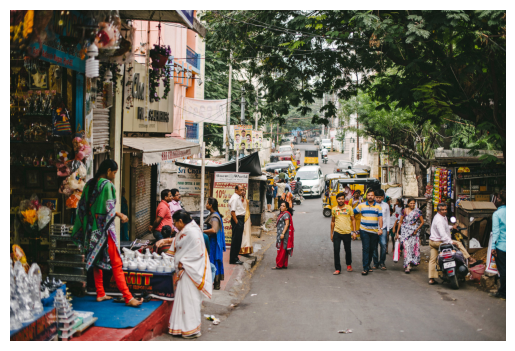

In [29]:
im_path = 'images/hyderabad.jpg'
image = cv2.imread(im_path)  # Load image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig = plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

## Run model on the image

In [58]:
# Load a model
model = YOLO("models/yolo11n.pt")

# Predict with the model
results = model(im_path)  # predict on an image
# Access the results
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box


image 1/1 /Users/johncao/Documents/Programming/Stanford/CS224G/backend/yolo_finetune/images/hyderabad.jpg: 448x640 12 persons, 2 cars, 1 truck, 52.8ms
Speed: 2.6ms preprocess, 52.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


## Visualize results

/var/folders/m1/1f35zp991ps2ljq0vpr6qr4h0000gn/T/ipykernel_5355/2441609990.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xywh = np.array(xywh)


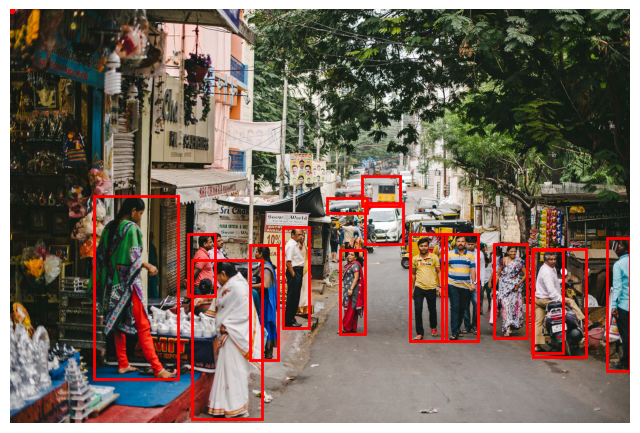

In [5]:
# Create a Matplotlib figure
plt.figure(figsize=(8, 6))
# Process each detected object
xywh = np.array(xywh)
keypoints = np.zeros([len(xywh), 2])

for idx, kp in enumerate(xywh):  # Get keypoints in "xywh" format
    x_center, y_center, w, h = kp  # Bounding box
    plt.gca().add_patch(plt.Rectangle((x_center - w/2, y_center - h/2), w, h, 
                                fill=False, edgecolor="red", linewidth=2))

    # Plot keypoints
    for (kx, ky) in keypoints:
        plt.scatter(kx, ky, s=30, c="red", marker="o")  # Green dots

# Show the image with keypoints
plt.imshow(image)
plt.axis("off")  # Hide axes

plt.show()

In [10]:
# Get total parameters
total_params = sum(p.numel() for p in model.model.parameters())

# Get trainable parameters
trainable_params = sum(p.numel() for p in model.model.parameters() if p.requires_grad)

print(f"Total Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")

Total Parameters: 2,616,248
Trainable Parameters: 0


In [6]:
import torch

detector = torch.load('models/yolo11n.pt')

In [7]:
for param in detector['model'].parameters():
    param.requires_grad = True
total_params = sum(p.numel() for p in detector['model'].parameters())

# Get trainable parameters
trainable_params = sum(p.numel() for p in detector['model'].parameters() if p.requires_grad)

print(f"Total Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")

Total Parameters: 2,624,080
Trainable Parameters: 2,624,080


In [46]:
image = cv2.resize(image, [640,640])
x = torch.tensor(image).unsqueeze(0).permute(0,3,1,2).float()
print(x.shape)
y = model.model(x)
y[0].boxes

torch.Size([1, 3, 640, 640])


AttributeError: 'Tensor' object has no attribute 'boxes'

In [75]:
out = model.model(x)
print(out[0][0][0])

tensor([ 22.2475,  12.1420,  38.9024,  ..., 485.1246, 525.7501, 535.6359])


In [4]:
0 % 3

0